In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv


In [2]:
train = pd.read_csv("/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv")
submission = pd.read_csv("/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv")
stores = pd.read_csv("/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv")
test = pd.read_csv("/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv")
features = pd.read_csv("/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv")

In [3]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
df_train = train.merge(stores, on='Store', how = 'inner')
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [7]:
df_test = test.merge(stores,on='Store',how='inner')
df_test.head()

,Store,Dept,Date,IsHoliday,Type,Size
0,1,1,2012-11-02,False,A,151315
1,1,1,2012-11-09,False,A,151315
2,1,1,2012-11-16,False,A,151315
3,1,1,2012-11-23,True,A,151315
4,1,1,2012-11-30,False,A,151315


In [8]:
dept_count = df_train["Dept"].value_counts().tolist()

In [9]:
df_train["Dept"].value_counts().sort_index()

1     6435
2     6435
3     6435
4     6435
5     6347
      ... 
95    6435
96    4854
97    6278
98    5836
99     862
Name: Dept, Length: 81, dtype: int64

In [10]:
dept_num = np.sort(df_test["Dept"].unique()).tolist()

In [11]:
pd.DataFrame(dept_count,dept_num)

,0
1,6435
2,6435
3,6435
4,6435
5,6435
...,...
95,235
96,150
97,143
98,16


In [12]:
plt.hist(pd.DataFrame(df_test["Dept"].value_counts())

SyntaxError: unexpected EOF while parsing (<ipython-input-12-8ffd2aaa22c9>, line 1)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

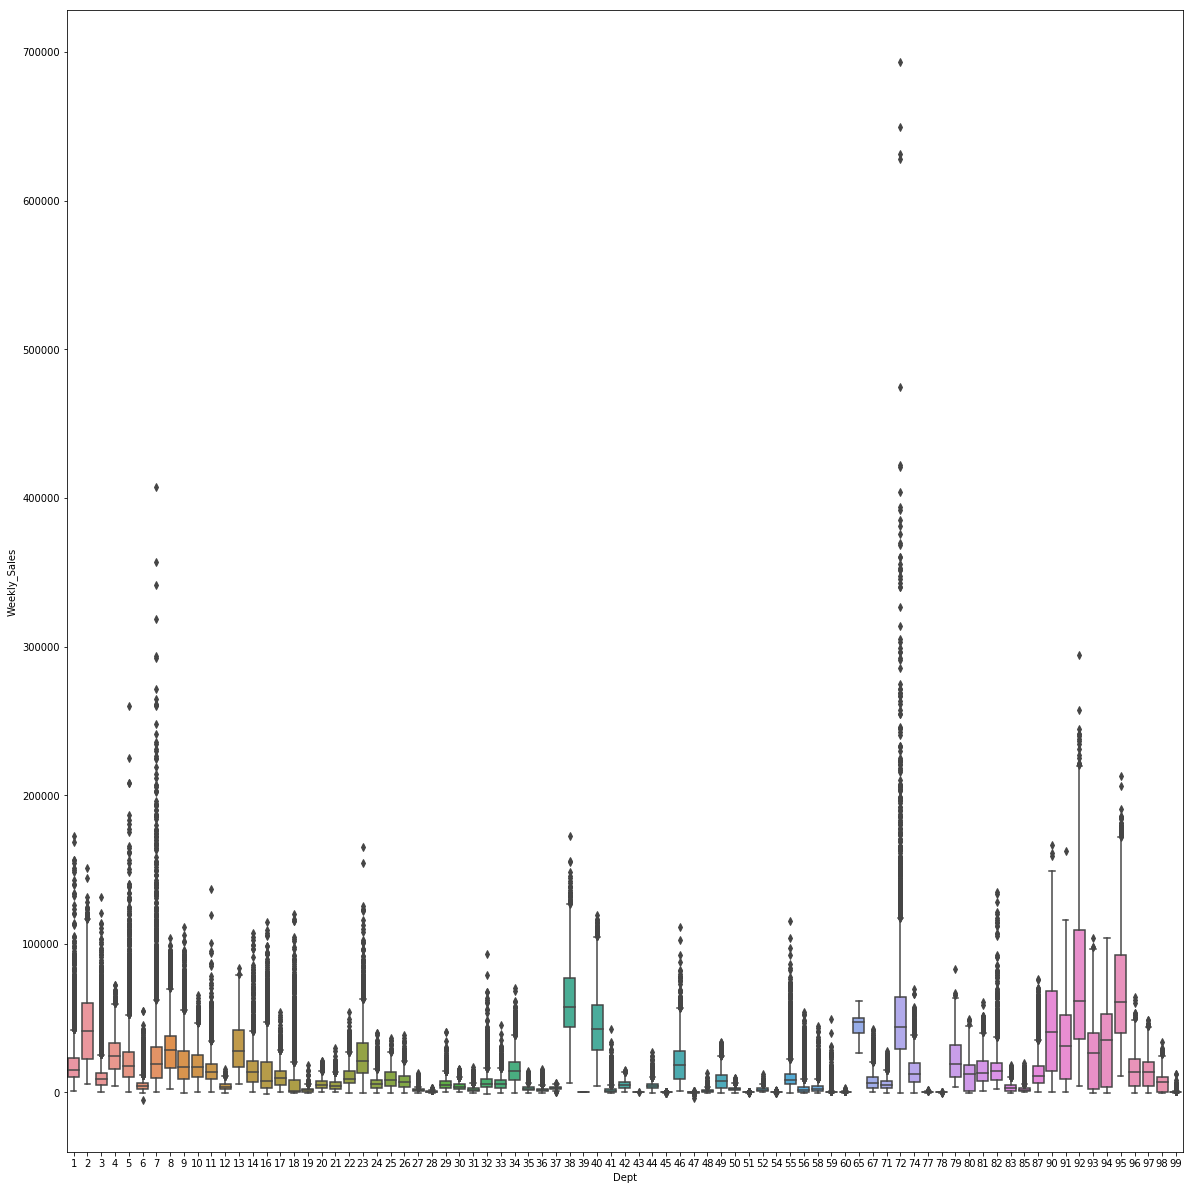

In [14]:
a,b = plt.subplots(1,1,figsize=(20,21))
sns.boxplot(x=train["Dept"],y=train["Weekly_Sales"])

In [15]:
holiday_df = train[train["IsHoliday"]==True]
nonholiday_df = train[train["IsHoliday"]==False]
holiday_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
1,1,1,2010-02-12,46039.49,True
31,1,1,2010-09-10,18194.74,True
42,1,1,2010-11-26,18820.29,True
47,1,1,2010-12-31,19124.58,True
53,1,1,2011-02-11,37887.17,True


In [16]:
t = pd.DataFrame(holiday_df["Weekly_Sales"].groupby(holiday_df["Dept"]).median())
label = holiday_df["Dept"].unique().tolist()


In [17]:
t1 = pd.DataFrame(nonholiday_df["Weekly_Sales"].groupby(nonholiday_df["Dept"]).median())
label1 = nonholiday_df["Dept"].unique().tolist()


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


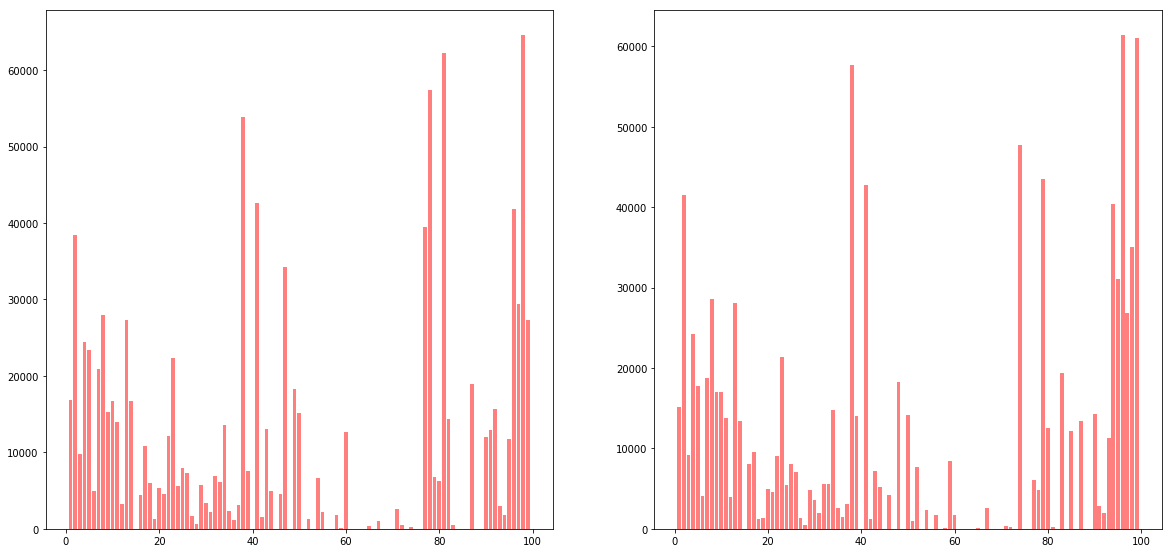

In [18]:
plt.figure(figsize=(20,21))
plt.subplot(221)
plt.subplot(222)

plt.subplot(221)
plt.bar(label, t["Weekly_Sales"], color='red',alpha=0.5 )

plt.subplot(222)
plt.bar(label1, t1["Weekly_Sales"], color='red',alpha=0.5)

plt.show()




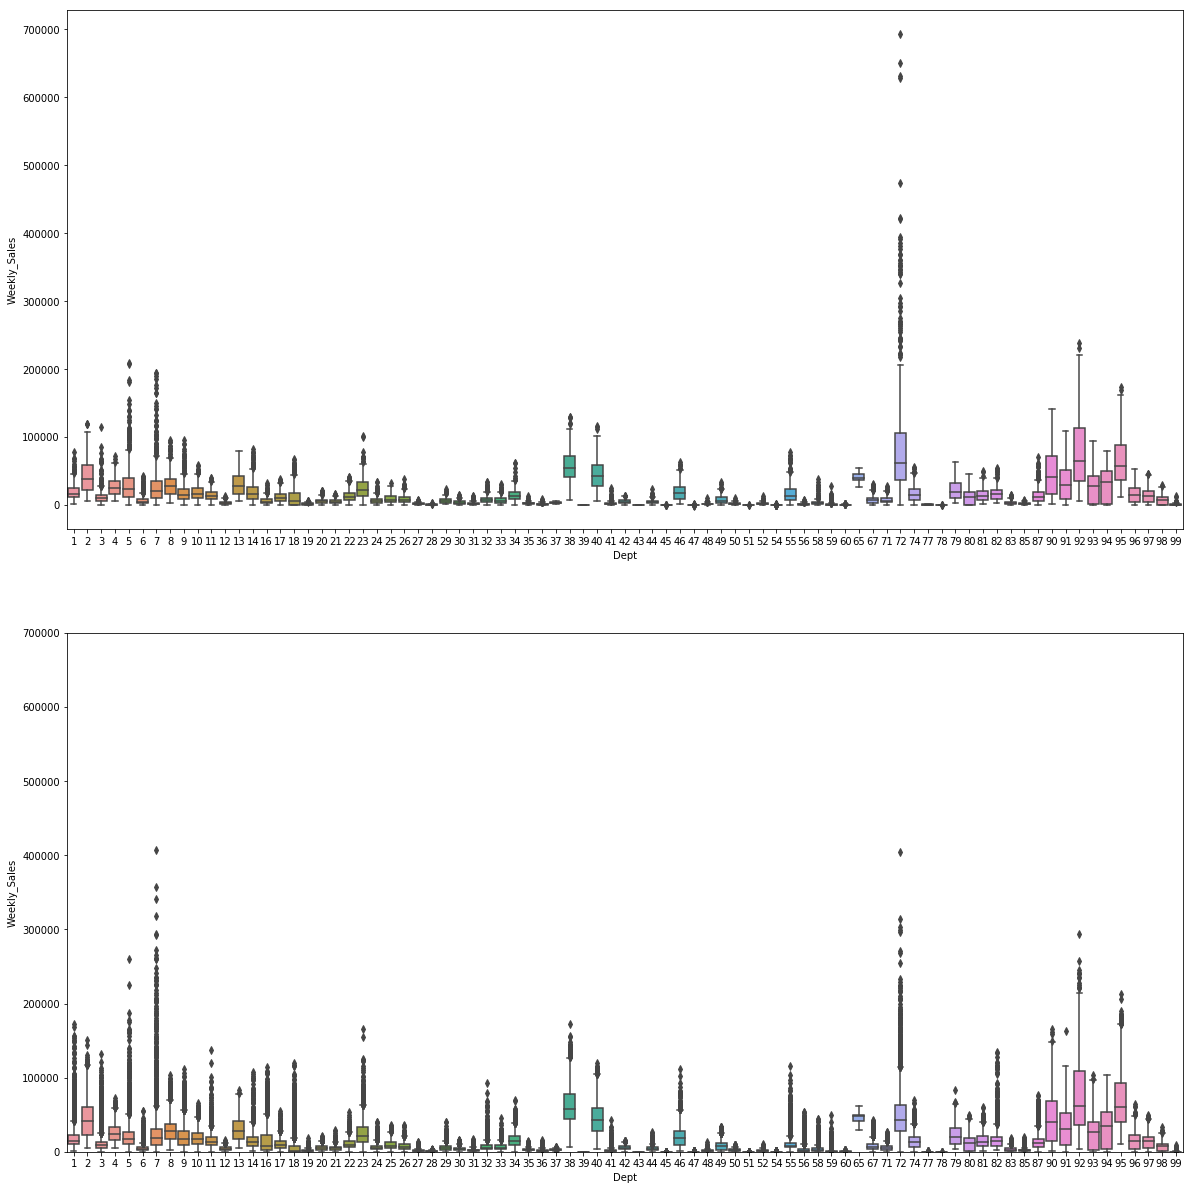

In [19]:
a,b = plt.subplots(2,1,figsize=(20,21))
plt.ylim(0,700000)
sns.boxplot(x=holiday_df["Dept"],y=holiday_df["Weekly_Sales"],ax=b[0])
sns.boxplot(x=nonholiday_df["Dept"],y=nonholiday_df["Weekly_Sales"],ax=b[1])

In [20]:
holiday_df["Weekly_Sales"].median()

7947.74

In [21]:
holiday_df["Weekly_Sales"].max()

693099.36

In [22]:
holiday_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
1,1,1,2010-02-12,46039.49,True
31,1,1,2010-09-10,18194.74,True
42,1,1,2010-11-26,18820.29,True
47,1,1,2010-12-31,19124.58,True
53,1,1,2011-02-11,37887.17,True


In [23]:
nonholiday_df["Weekly_Sales"].median()

7589.95

In [24]:
nonholiday_df["Weekly_Sales"].max()

406988.63

In [25]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [26]:
df_test.head()

,Store,Dept,Date,IsHoliday,Type,Size
0,1,1,2012-11-02,False,A,151315
1,1,1,2012-11-09,False,A,151315
2,1,1,2012-11-16,False,A,151315
3,1,1,2012-11-23,True,A,151315
4,1,1,2012-11-30,False,A,151315


In [27]:
df_train =df_train.replace({"A":1,"B":2,"C":3})
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,1,151315
1,1,1,2010-02-12,46039.49,True,1,151315
2,1,1,2010-02-19,41595.55,False,1,151315
3,1,1,2010-02-26,19403.54,False,1,151315
4,1,1,2010-03-05,21827.90,False,1,151315


In [28]:
df_test =df_test.replace({"A":1,"B":2,"C":3})
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,1,151315
1,1,1,2010-02-12,46039.49,True,1,151315
2,1,1,2010-02-19,41595.55,False,1,151315
3,1,1,2010-02-26,19403.54,False,1,151315
4,1,1,2010-03-05,21827.90,False,1,151315


In [29]:
df_test.head()

,Store,Dept,Date,IsHoliday,Type,Size
0,1,1,2012-11-02,False,1,151315
1,1,1,2012-11-09,False,1,151315
2,1,1,2012-11-16,False,1,151315
3,1,1,2012-11-23,True,1,151315
4,1,1,2012-11-30,False,1,151315


In [30]:
df_train["year"] = df_train["Date"].astype("datetime64").dt.year
df_test["year"] = df_test["Date"].astype("datetime64").dt.year

In [31]:

df_train["month"] = df_train["Date"].astype("datetime64").dt.month
df_test["month"] = df_test["Date"].astype("datetime64").dt.month

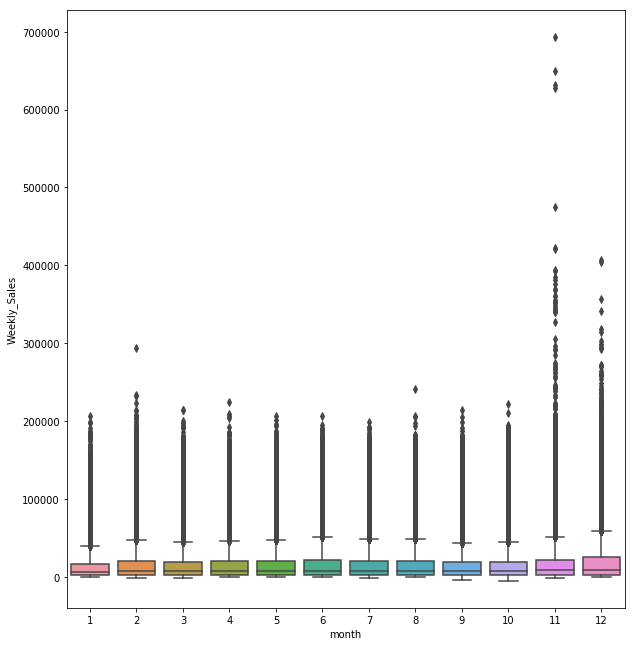

In [32]:
plt.subplots(1,1,figsize=(10,11))
sns.boxplot(x=df_train["month"],y=train["Weekly_Sales"])

In [33]:
#아웃라이어가 너무 커서 그래프가 잘 안보임; 아웃라이어 일단 지우고 다시 보기 

In [34]:
df_train["Weekly_Sales"]= train["Weekly_Sales"]

In [35]:
train2 = df_train[train["Weekly_Sales"]<=50000]


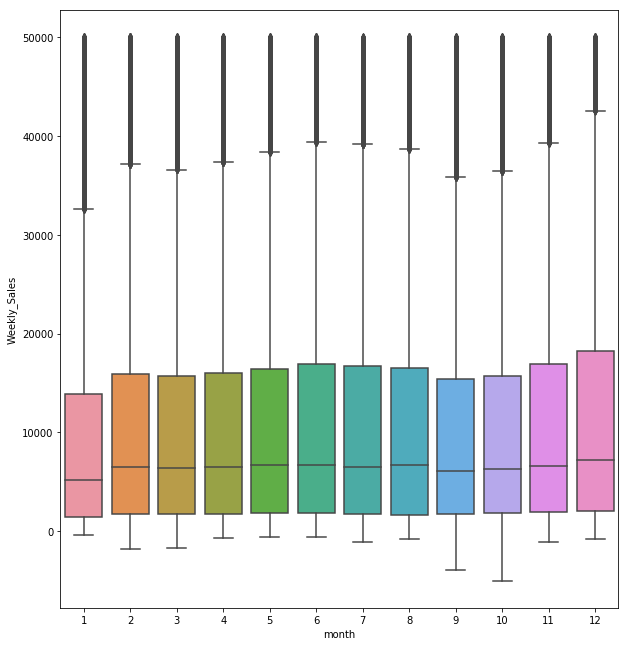

In [36]:
plt.subplots(1,1,figsize=(10,11))
sns.boxplot(x=train2["month"],y=train2["Weekly_Sales"])

In [37]:
# max값이 서로 다르게 나타남 --> 월마다의 데이터분포가 서로다름 --> 추가하면 도움ㅇ ㅣ된닫!!

In [38]:
df_train["month"].value_counts()#데이터가 많으므로 중간값이 비슷해질 수 있으나 조금씩이라도 차이가나끼 때문에

4     41332
7     40980
3     38451
10    38362
9     38339
8     38169
6     38137
2     35526
5     35314
12    29802
11    23613
1     23545
Name: month, dtype: int64

In [39]:
df_test["month"].value_counts()

11    14824
5     14726
3     14677
12    11965
2     11850
1     11799
4     11787
7     11732
6     11704
Name: month, dtype: int64

In [40]:
#IsHoliday변수는 단순 공휴일만 표시 -> 장사안되는 공휴일이 있을 수 있기 때문에. 정보 부족 --> week 추가하기 

#월별 몇주차인지 추가하기 : 1주차2주차,... 월말/월초에 대한 정보 추가할 수 있음; 월초보다 월말에 덜 삼; 그래프 찍어보기 
# 1년 52주 중 몇주차인지 추가하기 실제 공휴일이 있는 주를 파악할 수 있음; 

In [41]:
df_train["week"]= df_train["Date"].astype("datetime64").dt.week
df_test["week"]= df_test["Date"].astype("datetime64").dt.week

In [42]:
df_train["day"] = df_train["Date"].astype("datetime64").dt.day
df_test["day"] = df_test["Date"].astype("datetime64").dt.day

In [43]:
#df_train["weekday"] = df_train["Date"].astype("datetime64").dt.weekday
#df_test["weekday"] = df_test["Date"].astype("datetime64").dt.weekday

In [44]:
#통계량, 시각화 꼭 해서 피처 추가하기
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#df_train["weekday"].value_counts()

In [46]:
#주별 판매량-요일의미가없음

In [47]:
#plt.subplots(1,1,figsize=(10,11))
#sns.boxplot(x=df_train["weekday"],y=train["Weekly_Sales"])

In [48]:


df_train["SuperBowl"] =df_train["Date"].apply(lambda x: 1 if x in ['2010-02-12','2011-02-11','2012-02-10'] else 0)

df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,year,month,week,day,SuperBowl
0,1,1,2010-02-05,24924.50,False,1,151315,2010,2,5,5,0
1,1,1,2010-02-12,46039.49,True,1,151315,2010,2,6,12,1
2,1,1,2010-02-19,41595.55,False,1,151315,2010,2,7,19,0
3,1,1,2010-02-26,19403.54,False,1,151315,2010,2,8,26,0
4,1,1,2010-03-05,21827.90,False,1,151315,2010,3,9,5,0


In [49]:
df_test["SuperBowl"] =df_test["Date"].apply(lambda x: 1 if x in ['2010-02-12','2011-02-11','2012-02-10'] else 0)
df_test.head()

,Store,Dept,Date,IsHoliday,Type,Size,year,month,week,day,SuperBowl
0,1,1,2012-11-02,False,1,151315,2012,11,44,2,0
1,1,1,2012-11-09,False,1,151315,2012,11,45,9,0
2,1,1,2012-11-16,False,1,151315,2012,11,46,16,0
3,1,1,2012-11-23,True,1,151315,2012,11,47,23,0
4,1,1,2012-11-30,False,1,151315,2012,11,48,30,0


In [50]:
df_train["Laborday"] =df_train["Date"].apply(lambda x: 1 if x in ['2010-09-10','2011-09-09','2012-09-07','2013-09-06'] else 0)
df_test["Laborday"] =df_test["Date"].apply(lambda x: 1 if x in ['2010-09-10','2011-09-09','2012-09-07','2013-09-06'] else 0)


In [51]:
df_train["Thanksgiving"] =df_train["Date"].apply(lambda x: 1 if x in ['2010-11-26','2011-11-25','2012-11-23','2013-12-29'] else 0)
df_test["Thanksgiving"] =df_test["Date"].apply(lambda x: 1 if x in ['2010-11-26','2011-11-25','2012-11-23','2013-12-29'] else 0)


In [52]:
df_train["Christmas"] =df_train["Date"].apply(lambda x: 1 if x in ['2010-12-31','2011-12-30','2012-12-28','2013-12-27'] else 0)
df_test["Christmas"] =df_test["Date"].apply(lambda x: 1 if x in ['2010-12-31','2011-12-30','2012-12-28','2013-12-27'] else 0)


In [53]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,year,month,week,day,SuperBowl,Laborday,Thanksgiving,Christmas
0,1,1,2010-02-05,24924.50,False,1,151315,2010,2,5,5,0,0,0,0
1,1,1,2010-02-12,46039.49,True,1,151315,2010,2,6,12,1,0,0,0
2,1,1,2010-02-19,41595.55,False,1,151315,2010,2,7,19,0,0,0,0
3,1,1,2010-02-26,19403.54,False,1,151315,2010,2,8,26,0,0,0,0
4,1,1,2010-03-05,21827.90,False,1,151315,2010,3,9,5,0,0,0,0


In [54]:
df_train = df_train.drop("Date",axis=1)
df_test = df_test.drop("Date",axis=1)

In [55]:
df_train[df_train["Weekly_Sales"]<=0]=0.1



In [56]:
df_train.describe()

,Store,Dept,Weekly_Sales,Type,Size,year,month,week,day,SuperBowl,Laborday,Thanksgiving,Christmas
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.124434,44.099117,15981.467572,1.584702,136309.222311,2004.490860,6.429411,25.745529,15.623735,0.021370,0.021272,0.014427,0.014339
std,12.827872,30.562167,22711.032219,0.670665,61385.815676,113.948648,3.258098,14.204690,8.783156,0.143607,0.143283,0.118019,0.117658
min,0.100000,0.100000,0.010000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,18.000000,2079.650000,1.000000,93638.000000,2010.000000,4.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,37.000000,7612.030000,1.000000,140167.000000,2011.000000,6.000000,26.000000,16.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,72.000000,20205.852500,2.000000,202505.000000,2012.000000,9.000000,38.000000,23.000000,0.000000,0.000000,0.000000,0.000000
max,45.000000,99.000000,693099.360000,3.000000,219622.000000,2012.000000,12.000000,52.000000,31.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
df_ytrain = df_train["Weekly_Sales"]

In [58]:
df_train = df_train.drop("Weekly_Sales",1)

In [59]:
df_train.head()

,Store,Dept,IsHoliday,Type,Size,year,month,week,day,SuperBowl,Laborday,Thanksgiving,Christmas
0,1.0,1.0,False,1.0,151315.0,2010.0,2.0,5.0,5.0,0.0,0.0,0.0,0.0
1,1.0,1.0,True,1.0,151315.0,2010.0,2.0,6.0,12.0,1.0,0.0,0.0,0.0
2,1.0,1.0,False,1.0,151315.0,2010.0,2.0,7.0,19.0,0.0,0.0,0.0,0.0
3,1.0,1.0,False,1.0,151315.0,2010.0,2.0,8.0,26.0,0.0,0.0,0.0,0.0
4,1.0,1.0,False,1.0,151315.0,2010.0,3.0,9.0,5.0,0.0,0.0,0.0,0.0


In [60]:
df_ytrain.isna().sum()

0

In [61]:
df_ytrain.head()

0    24924.50
1    46039.49
2    41595.55
3    19403.54
4    21827.90
Name: Weekly_Sales, dtype: float64

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=4)

In [64]:
rf.fit(df_train,np.log(df_ytrain))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [65]:
df_train.head()

,Store,Dept,IsHoliday,Type,Size,year,month,week,day,SuperBowl,Laborday,Thanksgiving,Christmas
0,1.0,1.0,False,1.0,151315.0,2010.0,2.0,5.0,5.0,0.0,0.0,0.0,0.0
1,1.0,1.0,True,1.0,151315.0,2010.0,2.0,6.0,12.0,1.0,0.0,0.0,0.0
2,1.0,1.0,False,1.0,151315.0,2010.0,2.0,7.0,19.0,0.0,0.0,0.0,0.0
3,1.0,1.0,False,1.0,151315.0,2010.0,2.0,8.0,26.0,0.0,0.0,0.0,0.0
4,1.0,1.0,False,1.0,151315.0,2010.0,3.0,9.0,5.0,0.0,0.0,0.0,0.0


In [66]:
t = rf.feature_importances_

In [67]:
importance = pd.DataFrame(["Store","Dept","IsHoliday","Type","Size","year","month","day","weekday","SuperBowl","Laborday","Thanksgiving","Christmas"])

In [68]:
importance["feature"] = t

In [69]:
importance.sort_values(by="feature",ascending=False)

,0,feature
1,Dept,0.661857
4,Size,0.165003
0,Store,0.054964
7,day,0.040681
3,Type,0.024522
5,year,0.020563
8,weekday,0.019656
6,month,0.011657
2,IsHoliday,0.000331
12,Christmas,0.000245


In [70]:
result = np.exp(rf.predict(df_test))

In [71]:
submission.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [72]:
submission["Weekly_Sales"]=result


In [73]:
submission.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,30973.316070
1,1_1_2012-11-09,20501.567210
2,1_1_2012-11-16,19061.813784
3,1_1_2012-11-23,20075.790505
4,1_1_2012-11-30,22622.669691


In [74]:
submission.to_csv("submission.csv",index=False)